### Постановка задачи
Построить модель энергопотребления здания по часам. Погоду и характеристики здания пока не рассматривать.

Данные: http://video.ittensive.com/machine-learning/ashrae/train.0.0.csv.gz
Соревнование: https://www.kaggle.com/c/ashrae-energy-prediction/

© ITtensive, 2020

### Загрузка библиотек

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 16, 8

### Загрузка данных
Энергопотребление здания 0

In [2]:
energy_0 = pd.read_csv("http://video.ittensive.com/machine-learning/ashrae/train.0.0.csv.gz")
print (energy_0.head())

   building_id  meter            timestamp  meter_reading
0            0      0  2016-01-01 00:00:00            0.0
1            0      0  2016-01-01 01:00:00            0.0
2            0      0  2016-01-01 02:00:00            0.0
3            0      0  2016-01-01 03:00:00            0.0
4            0      0  2016-01-01 04:00:00            0.0


### Обогащение данных
Добавим серию с часом суток для построения суточной модели потребления

In [3]:
energy_0["timestamp"] = pd.to_datetime(energy_0["timestamp"])
energy_0["hour"] = energy_0["timestamp"].dt.hour
print (energy_0.head())

   building_id  meter           timestamp  meter_reading  hour
0            0      0 2016-01-01 00:00:00            0.0     0
1            0      0 2016-01-01 01:00:00            0.0     1
2            0      0 2016-01-01 02:00:00            0.0     2
3            0      0 2016-01-01 03:00:00            0.0     3
4            0      0 2016-01-01 04:00:00            0.0     4


### Среднее потребление по часам
Выведем среднее и медиану потребления энергии по часам

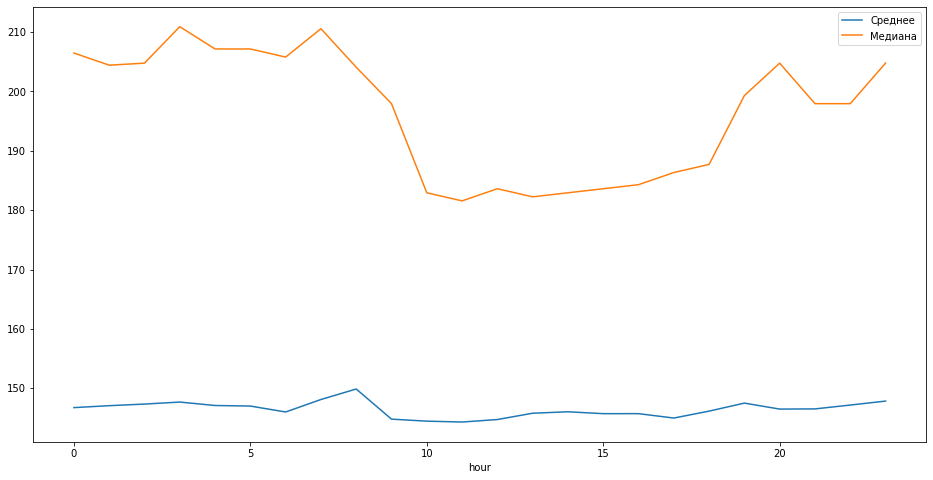

In [4]:
energy_0_hours = energy_0.groupby("hour")
energy_0_averages = pd.DataFrame(
    {"Среднее": energy_0_hours.mean()["meter_reading"],
     "Медиана": energy_0_hours.median()["meter_reading"]})
energy_0_averages.plot()
plt.show()

### Фильтруем метрику
Удаляем нулевые значения из статистики

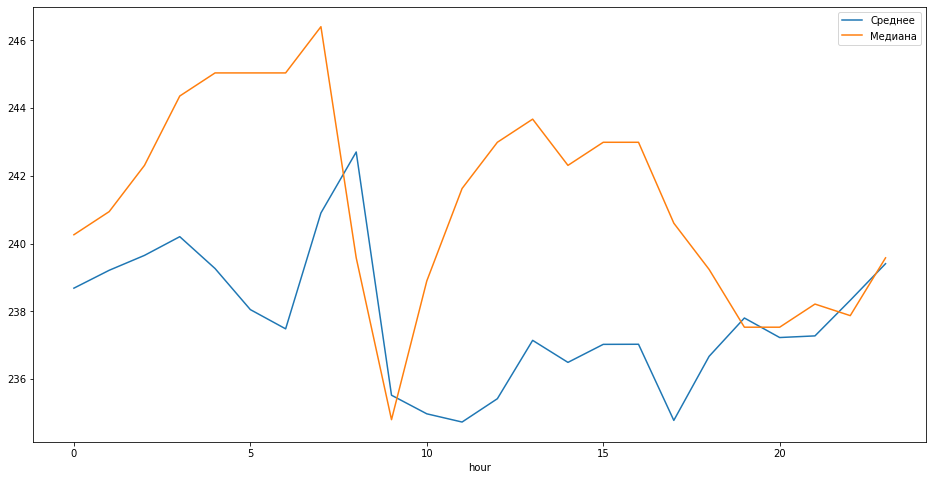

In [5]:
energy_0_hours_filtered = energy_0[energy_0["meter_reading"]>0].groupby("hour")
energy_0_averages_filtered = pd.DataFrame(
    {"Среднее": energy_0_hours_filtered.mean()["meter_reading"],
     "Медиана": energy_0_hours_filtered.median()["meter_reading"]})
energy_0_averages_filtered.plot()
plt.show()

### Интерполируем данные по часам
Построим модель внутрисуточного потребление энергии по зданию

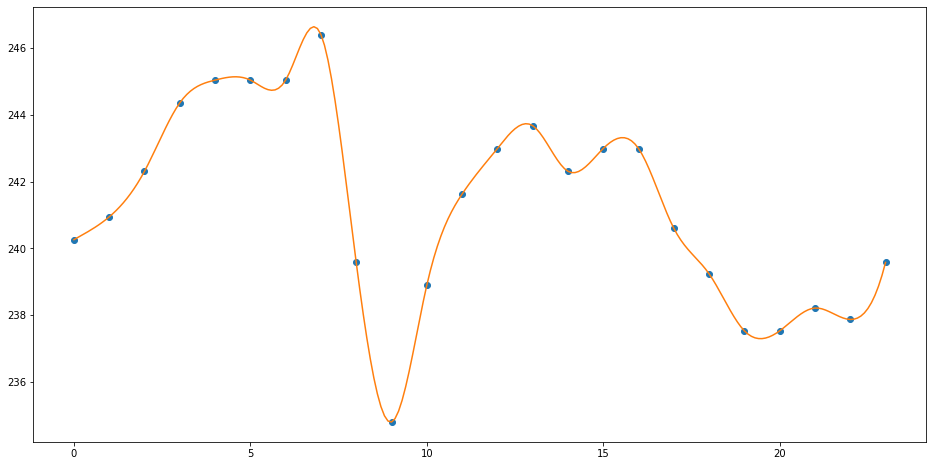

In [6]:
x = np.arange(0, 24)
y = interp1d(x, energy_0_hours_filtered.median()["meter_reading"], kind="cubic")
xn = np.arange(0, 23.1, 0.1)
yn = y(xn)
plt.plot(x, energy_0_hours_filtered.median()["meter_reading"],
         'o', xn, yn, '-')
plt.show()